In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.18.0-dev20240614


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kelvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('E:/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.head()

0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....

In [4]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

sentiment          id                          date     query  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

           user_id                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

In [5]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [6]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

sentiment                                               text
0  Negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1  Negative  is upset that he can't update his Facebook by ...
2  Negative  @Kenichan I dived many times for the ball. Man...
3  Negative    my whole body feels itchy and like its on fire 
4  Negative  @nationwideclass no, it's not behaving at all....

Text(0.5, 1.0, 'Sentiment Data Distribution')

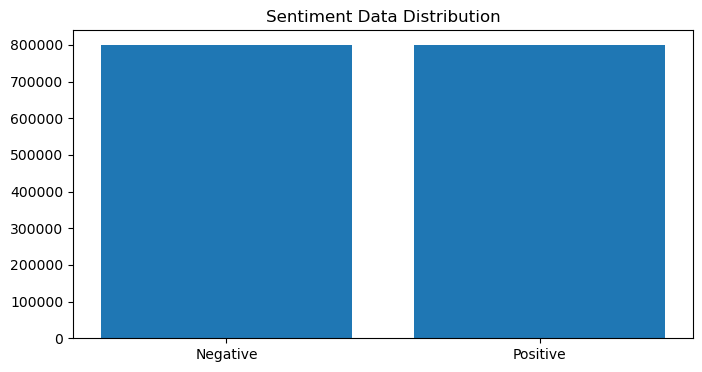

In [7]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [8]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

sentiment                                               text
1052769  Positive  @EmilyyBrowningg A bit of a twitter break, I u...
993922   Positive  Business Coach - Just posted my latest report ...
1075124  Positive                            @FunkinPretty sup sexy 
1593308  Positive            @adthrelfall Ta, that would be useful. 
874721   Positive   @SUAREASY you just waved at me..thanks for that 
57437    Negative         need to go to bed now   i'm wide awake too
638494   Negative  need to get something into my stomach but what...
347941   Negative  Just dropped the car off at rdu.  i dont want ...
352389   Negative          @xkathyxrocksx  You really should come...
250595   Negative  &quot;Sunday morning rain is falling...&quot; ...

In [9]:
stemmer = SnowballStemmer('english')

def decontracted(phrase):
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Kelvin\AppData\Local\Temp\ipykernel_13476\2477235340.py:13: SyntaxWarning: invalid escape sequence '\S'
  text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


In [10]:
def preprocess(text, stem=False):
  text = decontracted(text)
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if stem:
      tokens.append(stemmer.stem(token))
    else:
      tokens.append(token)
  return " ".join(tokens)

In [11]:
df.text = df.text.apply(lambda x: preprocess(x))

In [12]:
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[884061,:].head(10) # Returns the rows with the index and display it

sentiment                  Positive
text         i know is not that sad
Name: 884061, dtype: object

# Split & Train

In [13]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [14]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=7)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [15]:
test_data.dropna()
test_data.reset_index(drop=True, inplace=True)

In [16]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 291355


In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [18]:
labels = train_data.sentiment.unique().tolist()

In [19]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


In [1]:
import pickle
sentiment_model = pickle.load(open("E:/Research ML/LSTM_SentimentAnalysis.pkl", 'rb'))
sarcasm_model = pickle.load(open("E:/Research ML/LSTM_SarcasmDetection.pkl", 'rb'))

In [20]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"

scores = sentiment_model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 493ms/step


In [21]:
from sklearn.metrics import classification_report
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.82      0.83      0.82    160542
    Positive       0.82      0.82      0.82    159458

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



In [22]:
sarcasm_scores = sarcasm_model.predict(x_test, verbose=1, batch_size=1000)
after_pred_1d = []
count = 0
changed_idx = []

320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


In [23]:
for idx, score in enumerate(scores):
    sentiment = ""
    if score>0.5:
        sentiment = "Positive"
    else:
        sentiment = "Negative"

    if sarcasm_scores[idx][0]>0.5 and sentiment == "Positive":
        sentiment = "Negative"
        changed_idx.append(idx)
        count+=1
    elif sarcasm_scores[idx][0]>0.5 and sentiment == "Negative":
        sentiment = "Positive"
        changed_idx.append(idx)
        count+=1

    after_pred_1d.append(sentiment)

In [24]:
for idx in changed_idx:
    print(test_data.text.get(idx))

wish i couldve seen miley and nick sing 2night
just started to catch up on house viewing kind of odd as i was watched blackadder the third last night from george to house
watching spanish television with mom
2 days to go and i still do not know what to do how will i even spend the 2k and my mom said save it as much as possible wth l
i just ate a huge salad from trader joes im still hungry salads dont fill you up
quot orlando u must do it get twitter if not 4 u do it 4 ur fans quot show that 2 him mirandam hope that helps xoxo
todays the last day
sorry quot enter quot button got me again you are such a cool mom
renal system finally almost done then some footy yaa
the exact same thing happened to me yesterday i was not sure if i should be insulted or flattered went with flattered
awww we should set them up on blind dates hahaha ape yang in common anyway
shakes head terrible
i highly recommends you join www m2e asia you can earn money from free shareholder by dividends even you do nothing

In [25]:
print(count)

92134


In [26]:
print(classification_report(list(test_data.sentiment), after_pred_1d))

              precision    recall  f1-score   support

    Negative       0.65      0.63      0.64    160542
    Positive       0.64      0.66      0.65    159458

    accuracy                           0.64    320000
   macro avg       0.64      0.64      0.64    320000
weighted avg       0.64      0.64      0.64    320000

